# First go <br>
at looking at some data statistics and how the different datasets relate to one another

In [1]:
# Imports
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [2]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [52]:
books_50k = pd.read_json('../raw_data/goodreads_books.json.gz',
                          lines=True,
                          compression='gzip',
                          nrows=50_000)

# Analysis description <br>
All columns are object type, so number ones need to be converted. <br>
We may select languages that are eng or '' (as those are Eng too, it seems) <br>
We may want to make individual columns for popular shelves (such as 'to-read count') <br>

In [53]:
books_50k.dtypes
# Convert to numeric columns
num_cols = [
    'text_reviews_count',
    'average_rating',
    'num_pages',
    'ratings_count'
]
books_50k[num_cols] = books_50k[num_cols].apply(
    lambda x: pd.to_numeric(x, errors='coerce')
)

In [54]:
# check country code columns
display(books_50k[books_50k['country_code'] == ''].shape)
# assign blank country code as NA
books_50k['country_code'] = books_50k['country_code'].apply(
    lambda x: pd.NA if x == '' else x
)

(8, 29)

In [ ]:
# check language column
# Show count for all languages
pd.set_option('display.max_rows', None)
display(books_50k['language_code'].value_counts().sort_values())
pd.reset_option('display.max_rows')

# keep only eng lang books
eng_lang = ['eng', 'en-US', 'en-GB', 'en-CA', '']
books_50k = books_50k[books_50k['language_code'].isin(eng_lang)]


language_code
dum          1
pra          1
lat          1
ota          1
arw          1
enm          1
aze          1
fao          1
crh          1
gla          1
glg          1
mus          2
tgl          2
sqi          2
grc          2
pt-BR        2
es-MX        2
kan          2
mya          2
wel          2
mkd          3
hye          3
guj          3
--           3
en           3
nno          3
kur          4
tel          4
nep          5
bos          5
mon          5
mar          6
isl          6
mul          6
fil          7
kor          8
nob          8
mal          8
afr          8
tam         13
slv         14
urd         15
kat         16
pes         18
cat         19
hin         19
heb         20
ukr         23
slo         38
lav         41
lit         41
est         42
zho         42
hun         43
srp         54
tha         54
nor         60
scr         63
ben         66
vie         74
rum        100
dan        110
msa        127
pol        133
rus        135
bul        

In [ ]:
# Check similar books column
books_50k.similar_books.apply(lambda x: len(x)).sort_values()

# check num pages column
books_50k.num_pages.value_counts().sort_index()
display(books_50k['num_pages'].quantile([0.25, 0.5, 0.75, 0.9, 0.99, 1]))

# remove the massive book as outlier
books_50k

0.25       144.0
0.50       245.0
0.75       336.0
0.90       435.0
0.99       812.0
1.00    945077.0
Name: num_pages, dtype: float64

In [ ]:

# describe
books_50k[num_cols].describe()


,text_reviews_count,average_rating,num_pages,ratings_count
count,49991.000000,49991.000000,33822.000000,49991.00000
mean,30.922126,3.867237,290.168529,427.61341
std,350.734013,0.535778,5140.716885,6697.53684
min,0.000000,0.000000,0.000000,0.00000
25%,2.000000,3.630000,148.000000,6.00000
50%,4.000000,3.910000,246.000000,21.00000
75%,12.000000,4.160000,345.000000,81.00000
max,38878.000000,5.000000,945077.000000,575163.00000


In [60]:
# check max values for num cols
books_50k[books_50k['num_pages'] == 945077.000000]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
18037,,30.0,[],US,eng,"[{'count': '46530', 'name': 'currently-reading...",B003ODIZL6,true,3.97,,"[6183819, 12728698, 8294444, 874941, 130068, 2...","""Oxford's American editors drew on its 200-mil...",Kindle Edition,https://www.goodreads.com/book/show/18684543-t...,"[{'author_id': '14392', 'role': 'Editor'}]",Oxford University Press Inc.,945077.0,,,,2nd Edition,2008,https://www.goodreads.com/book/show/18684543-t...,https://images.gr-assets.com/books/1382015770m...,18684543,378.0,762000,The New Oxford American Dictionary,The New Oxford American Dictionary


['text_reviews_count', 'average_rating', 'num_pages', 'ratings_count']

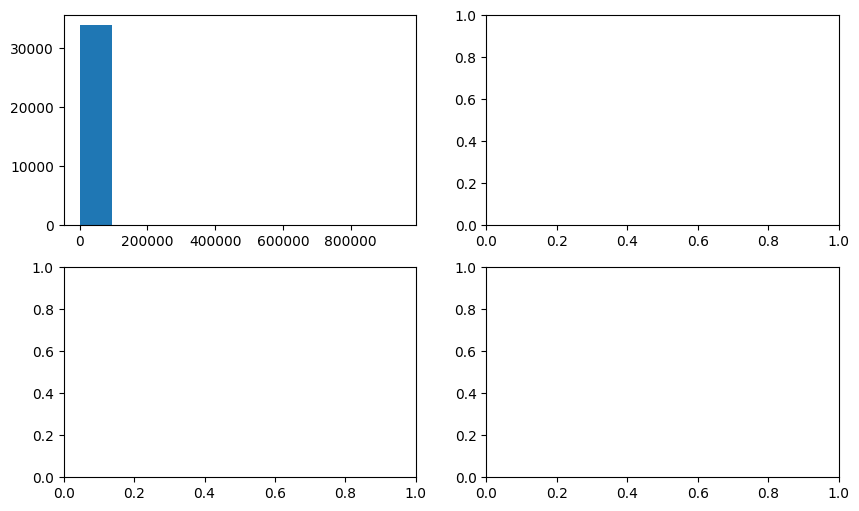

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))
ax[0, 0].hist(books_50k['num_pages'], bins=10)
num_cols

In [58]:
books_50k['num_pages'].quantile([0.5, 0.9, 0.99, 0.999])

0.500     246.000
0.900     448.000
0.990     830.790
0.999    1770.234
Name: num_pages, dtype: float64